In [1]:
import sys
import os
sys.path.insert(0, '../verificator')

In [2]:
os.environ["CUDA_VISIBLE_DEVICES"]="0"

In [3]:
video_path = '/home/shareduser/d_test/data/videos/cam_2'
img_saving_path = '/home/shareduser/d_test/data/pics/cam_2_thr_0.5'
emb_saving_path ='/home/shareduser/d_test/data/models/embeddings'
numpy_saving_path = os.path.join(img_saving_path, 'deep_sort_features')
tpe_weights_saving_path = '/home/shareduser/d_test/data/models/tpe_weights'
deep_sort_model_path = '../verificator/verificator/deep_sort/resources/networks/mars-small128.ckpt-68577'

In [4]:
build_path = '/home/shareduser/d_test/data/models/yolo_init_config'
weights = os.path.join(build_path, 'bin', 'yolo.weights')
model = os.path.join(build_path, 'cfg', 'yolo-people.cfg')
cfg = os.path.join(build_path, 'cfg')
labels = os.path.join(build_path, 'labels.txt')
trained_model_path = '/home/shareduser/d_test/data/models/darkflow_retrain_all_imgs/full_data'

In [5]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [6]:
from verificator.verificator import Verificator
from verificator.feature_extractor import DeepSortExtractor
from verificator.tpe_predictor import TPEPredictor

Using TensorFlow backend.


In [7]:
list_of_dirs = [os.path.join(img_saving_path, p) for p in os.listdir(img_saving_path)]

In [8]:
list_of_dirs.sort()

In [9]:
list_of_dirs.pop()

'/home/shareduser/d_test/data/pics/cam_2_thr_0.5/deep_sort_features'

In [58]:
os.listdir(list_of_dirs[85])

['127_3.jpg', '127_2.jpg', '127_5.jpg', '127_0.jpg', '127_1.jpg', '127_4.jpg']

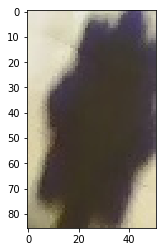

In [76]:
i = 25
img = cv2.imread(os.path.join(list_of_dirs[i], os.listdir(list_of_dirs[i])[0]))
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()

In [12]:
encoder = DeepSortExtractor(deep_sort_model_path)

feature dimensionality:  128


In [13]:
predictor = TPEPredictor(128,128)

../verificator/verificator/tpe_model/tpe_model_builder.py:43: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(128, input_dim=128, weights=[array([[ ..., use_bias=False, activation="linear")`
  base_model.add(Dense(n_out, input_dim=n_in, bias=False, weights=[W_pca], activation='linear'))
../verificator/verificator/tpe_model/tpe_model_builder.py:49: UserWarning: The `merge` function is deprecated and will be removed after 08/2017. Use instead layers from `keras.layers.merge`, e.g. `add`, `concatenate`, etc.
  e = merge([a_emb, p_emb, n_emb], mode=triplet_merge, output_shape=triplet_merge_shape)
/home/shareduser/.local/lib/python3.5/site-packages/keras/legacy/layers.py:460: UserWarning: The `Merge` layer is deprecated and will be removed after 08/2017. Use instead layers from `keras.layers.merge`, e.g. `add`, `concatenate`, etc.
  name=name)
../verificator/verificator/tpe_model/tpe_model_builder.py:50: UserWarning: Update your `Model` call to the Keras 2 API: `Model(input

In [14]:
predictor.load_weights(os.path.join(tpe_weights_saving_path, 'from_deep_sot_10_ep.h5'))

In [78]:
v = Verificator(encoder, predictor)

In [80]:
distance = 0.24209733262206568
img1 = os.path.join(list_of_dirs[25], os.listdir(list_of_dirs[25])[0])
img2 = os.path.join(list_of_dirs[24], os.listdir(list_of_dirs[24])[0])

In [21]:
v.verify(img1, img2, distance)[0][0][0]

True

In [81]:
stats = {}
for dir_ in list_of_dirs:
    files = os.listdir(dir_)
    nfiles = len(files)
    tcntr = 0
    for file in files:
        img = os.path.join(dir_,file)
        if v.verify(img1, img, distance)[0][0][0]:
            tcntr += 1
    stats[dir_] = tcntr/nfiles

In [82]:
bads_2 = []
for k,v in stats.items():
    if v == 1.0:
        bads_2.append(list_of_dirs.index(k))

In [83]:
for b in bads_2:
    print(os.path.basename(list_of_dirs[b]))

235
142
179
1109
106
135
834
247
116
777
1137
81
998
272
123
84


In [84]:
a = '0.1'
b = float(a)
b

0.1

In [3]:
fname = 'home/a.jpg'
import os

In [5]:
os.path.splitext(os.path.basename(fname))

('a', '.jpg')